In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
import numpy as np
import os
import cv2
import PIL
%matplotlib inline 


In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='D:\FLOWER_CLASSIFICATION' ,untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2053476785_c162a3e358.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5398569540_7d134c42cb_n.jpg')]

In [14]:
len(roses)

641

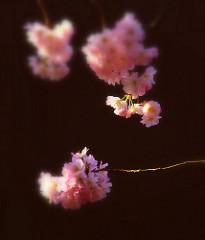

In [16]:
PIL.Image.open(str(roses[0]))

In [20]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tupils/*'))
}

In [21]:
flowers_images_dict_label={
    'roses':1,
    'dandelion':2,
    'daisy':3,
    'sunflowers':4,
    'tulips':5
}

In [25]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 205, 3)

In [27]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [30]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append( resized_img)
    y.append(flowers_images_dict_label[flower_name])


In [31]:
x=np.array(x)
y=np.array(y)

In [32]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [34]:
x_train=x_train/255
x_test=x_test/255

In [48]:
model = Sequential([
    data_augmentation,
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),


])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
61/61 [==============================] - 65s 1s/step - loss: 2.4068 - accuracy: 0.4592
Epoch 2/10
61/61 [==============================] - 65s 1s/step - loss: 2.0682 - accuracy: 0.5757
Epoch 3/10
61/61 [==============================] - 63s 1s/step - loss: 1.9540 - accuracy: 0.5855
Epoch 4/10
61/61 [==============================] - 64s 1s/step - loss: 1.9594 - accuracy: 0.5679
Epoch 5/10
61/61 [==============================] - 64s 1s/step - loss: 1.8438 - accuracy: 0.6131
Epoch 6/10
61/61 [==============================] - 64s 1s/step - loss: 1.7935 - accuracy: 0.6193
Epoch 7/10
61/61 [==============================] - 65s 1s/step - loss: 1.7941 - accuracy: 0.6136
Epoch 8/10
61/61 [==============================] - 63s 1s/step - loss: 1.7312 - accuracy: 0.6349
Epoch 9/10
61/61 [==============================] - 63s 1s/step - loss: 1.7065 - accuracy: 0.6256
Epoch 10/10
61/61 [==============================] - 64s 1s/step - loss: 1.6552 - accuracy: 0.6500


In [51]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 7s 242ms/step - loss: 1.7145 - accuracy: 0.6308


[1.7144798040390015, 0.6308016777038574]

In [41]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)